### Credit Card Fraud Detection

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration


In [1]:
# Import all the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# We load the dataset and explore the shape to see if it's all right
df = pd.read_csv('creditcard_train.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


The dataset contains data of 284657 credit card transactions. It contains numerical input variables V1-V28, which are the result of a Principal Component Analysis (PCA) transformation, since original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' records the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction amount. 'Class' is the response variable (labeled outcome) and takes the value 1 in case of fraud and 0 otherwise.  "1" and "0" are used as boolean indicators and "NA" is used to indicate missing data.

Remove rows with any columns containing the value "NA" to eliminate missing data, then reindex the dataframe. This cleanup will make it simpler to understand the actual number of rows in your dataset, facilitating better data exploration and more effective training of your machine learning model.

In [3]:
# Drop rows with any missing values in the DataFrame
df = df.dropna()

# Reset the index of the DataFrame and drop the old index
df = df.reset_index(drop=True)

798 rows were dropped for missing values and 283859 credit card transactions remain for further analysis.

In [4]:
# Step 1: Calculate the sum of V columns (V1 to V28) without modifying the original dataset
V_sum = df[[f'V{i}' for i in range(1, 29)]].sum(axis=1)  # Summing V1 to V28 columns for each row

# Step 2: Detect outliers based only on 'V_sum' and 'Amount'
columns_to_check = ['Amount']  # List of columns to check for outliers (only 'Amount' in this case)
outliers = pd.DataFrame()  # Initialize an empty DataFrame to store outliers

# Add V_sum as a standalone series for outlier detection
Q1 = V_sum.quantile(0.25)  # Calculate the first quartile (25th percentile)
Q3 = V_sum.quantile(0.75)  # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1  # Calculate the interquartile range (IQR)
lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
V_sum_outliers = V_sum[(V_sum < lower_bound) | (V_sum > upper_bound)]  # Detect outliers in V_sum

# Detect outliers for 'Amount' in the original DataFrame
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)  # Calculate the first quartile for the column
    Q3 = df[col].quantile(0.75)  # Calculate the third quartile for the column
    IQR = Q3 - Q1  # Calculate the interquartile range (IQR) for the column
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    outlier_condition = (df[col] < lower_bound) | (df[col] > upper_bound)  # Create a condition to detect outliers
    outliers = pd.concat([outliers, df[outlier_condition]], ignore_index=True)  # Add detected outliers to the outliers DataFrame

# Combine outliers from V_sum with outliers from Amount
outliers_indices = set(outliers.index).union(V_sum_outliers.index)  # Combine indices of all detected outliers

# Remove outliers from the original dataset
cleaned_data = df[~df.index.isin(outliers_indices)]  # Filter out the detected outliers to create a cleaned dataset

# Step 3: Compare summary statistics for V_sum and Amount
def compare_statistics(original_sum, cleaned_sum, original_data, cleaned_data):
    # Summary statistics for V_sum
    print("\nV_sum Statistics (Original):")
    print(original_sum.describe())  # Print summary statistics for the original V_sum
    
    print("\nV_sum Statistics (Cleaned):")
    print(cleaned_sum.describe())  # Print summary statistics for the cleaned V_sum
    
    # Summary statistics for original and cleaned data
    print("\nOriginal Data Statistics:")
    print(original_data.describe())  # Print summary statistics for the original dataset
    
    print("\nCleaned Data Statistics:")
    print(cleaned_data.describe())  # Print summary statistics for the cleaned dataset

# Compare statistics
compare_statistics(V_sum, V_sum[~V_sum.index.isin(outliers_indices)], df[['Amount']], cleaned_data[['Amount']])  # Call the function to compare statistics




V_sum Statistics (Original):
count    283859.000000
mean          0.006837
std           5.482188
min        -198.354886
25%          -2.419463
50%           0.491637
75%           3.019368
max          22.450415
dtype: float64

V_sum Statistics (Cleaned):
count    244773.000000
mean          0.144464
std           3.934681
min         -10.576964
25%          -2.377569
50%           0.379504
75%           2.815330
max          11.176930
dtype: float64

Original Data Statistics:
              Amount
count  283859.000000
mean       88.425282
std       250.417781
min         0.000000
25%         5.600000
50%        22.000000
75%        77.250000
max     25691.160000

Cleaned Data Statistics:
              Amount
count  244773.000000
mean       80.690719
std       190.412300
min         0.000000
25%         5.330000
50%        21.460000
75%        75.000000
max     10199.440000


 As the difference between the original data and cleaned data are significant enough, 38962 rows were consequently removed as outliers in the V_sum and amount columns. 244897 rows remain. 

### Module 2: Data Visualization

C:\Users\chowd\AppData\Local\Temp\ipykernel_5056\2084421349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_fraud_data['Log_Amount'] = np.log1p(non_fraud_data['Amount'])


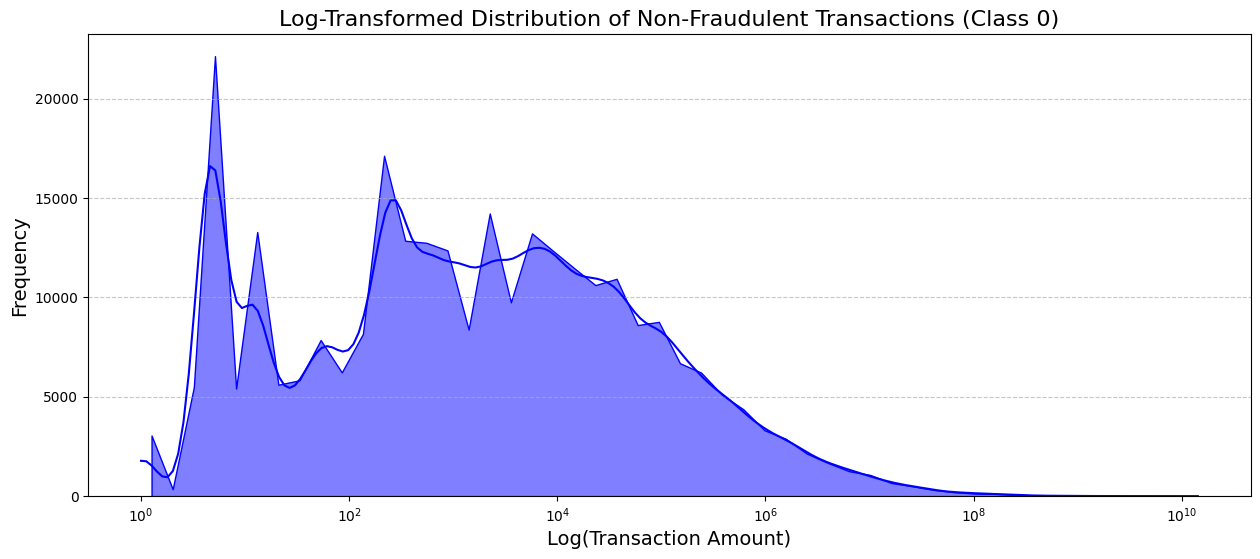

In [5]:
# Import the FuncFormatter class from the matplotlib.ticker module
from matplotlib.ticker import FuncFormatter

# Assign the DataFrame to a variable named data
data = df

# Filter the data to include only non-fraudulent transactions (Class 0)
non_fraud_data = data[data['Class'] == 0]

# Add a small constant to avoid log(0) issues by log-transforming the 'Amount' column
non_fraud_data['Log_Amount'] = np.log1p(non_fraud_data['Amount'])

# Define a function to format the x-axis labels as powers of 10
def log_format(x, pos):
    return f'$10^{{{int(x)}}}$'

# Create a figure with the specified size
plt.figure(figsize=(15, 6))

# Plot the log-transformed distribution of non-fraudulent transaction amounts
sns.histplot(non_fraud_data['Log_Amount'], bins=50, kde=True, color='blue', element='poly')

# Set the title of the plot
plt.title('Log-Transformed Distribution of Non-Fraudulent Transactions (Class 0)', fontsize=16)

# Label the x-axis
plt.xlabel('Log(Transaction Amount)', fontsize=14)

# Label the y-axis
plt.ylabel('Frequency', fontsize=14)

# Add a grid to the y-axis with dashed lines and some transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis formatter to use the log_format function
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_format))

# Display the plot
plt.show()

The histogram, illustrated in blue, shows that most transactions are clustered at lower amounts with a peak around 10^1. The distribution then tapers off as the amount increases, highlighting the prevalence of smaller transaction amounts in non-fraudulent activities.

C:\Users\chowd\AppData\Local\Temp\ipykernel_5056\2365399405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['Log_Amount'] = np.log1p(fraud_data['Amount'])


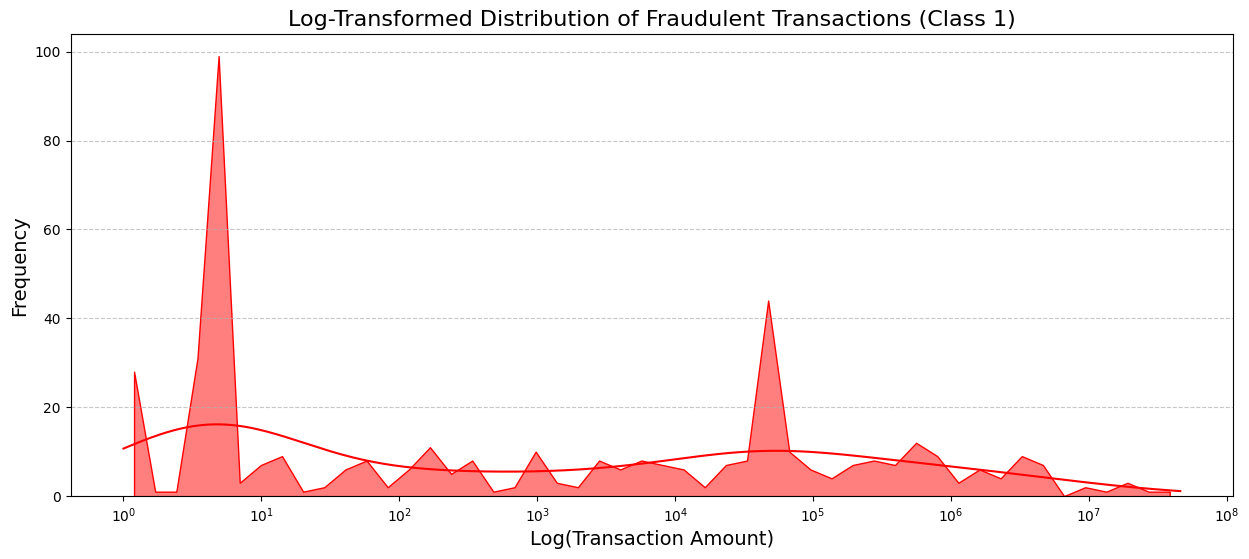

In [6]:
# Import the FuncFormatter class from the matplotlib.ticker module
from matplotlib.ticker import FuncFormatter

# Assign the DataFrame to a variable named data
data = df

# Filter the data to include only fraudulent transactions (Class 1)
fraud_data = data[data['Class'] == 1]

# Add a small constant to avoid log(0) issues by log-transforming the 'Amount' column
fraud_data['Log_Amount'] = np.log1p(fraud_data['Amount'])

# Define a function to format the x-axis labels as powers of 10
def log_format(x, pos):
    return f'$10^{{{int(x)}}}$'

# Create a figure with the specified size
plt.figure(figsize=(15, 6))

# Plot the log-transformed distribution of fraudulent transaction amounts
sns.histplot(fraud_data['Log_Amount'], bins=50, kde=True, color='red', element='poly')

# Set the title of the plot
plt.title('Log-Transformed Distribution of Fraudulent Transactions (Class 1)', fontsize=16)

# Label the x-axis
plt.xlabel('Log(Transaction Amount)', fontsize=14)

# Label the y-axis
plt.ylabel('Frequency', fontsize=14)

# Add a grid to the y-axis with dashed lines and some transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis formatter to use the log_format function
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_format))

# Display the plot
plt.show()

The blue histogram bars and overlaying density estimate line highlight a prominent peak around 10^1, indicating a concentration of fraudulent transactions at this log-transformed amount. The distribution gradually decreases as the transaction amounts increase, emphasizing that fraudulent activities are more common with smaller transactions however it's more spread out and heavier on higher amounts relative to non fraudulent transactions.

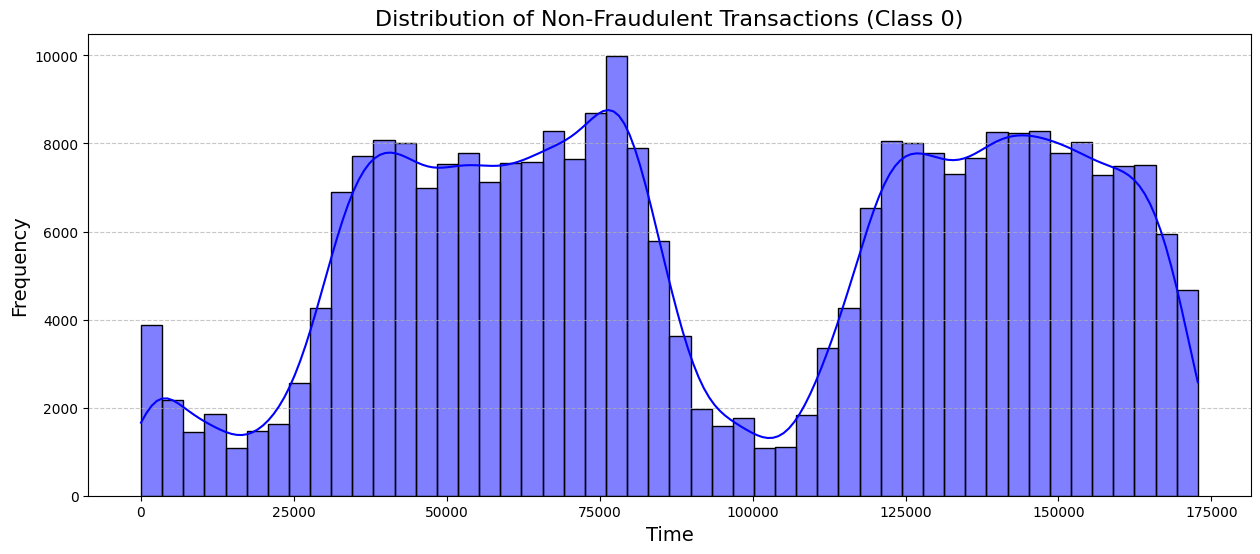

In [7]:
# Filter the data to include only non-fraudulent transactions (Class 0)
non_fraud_data = df[df['Class'] == 0]

# Create a figure with the specified size
plt.figure(figsize=(15, 6))

# Plot the distribution of non-fraudulent transactions over time
sns.histplot(non_fraud_data['Time'], bins=50, kde=True, color='blue')

# Set the title of the plot
plt.title('Distribution of Non-Fraudulent Transactions (Class 0)', fontsize=16)

# Label the x-axis
plt.xlabel('Time', fontsize=14)

# Label the y-axis
plt.ylabel('Frequency', fontsize=14)

# Add a grid to the y-axis with dashed lines and some transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

The histogram, illustrated in blue with a density estimate overlay, reveals notable peaks at certain time intervals. These peaks suggest periods of higher non-fraudulent transaction activity, providing insight into temporal patterns that may help identify trends or anomalies in transaction behavior.

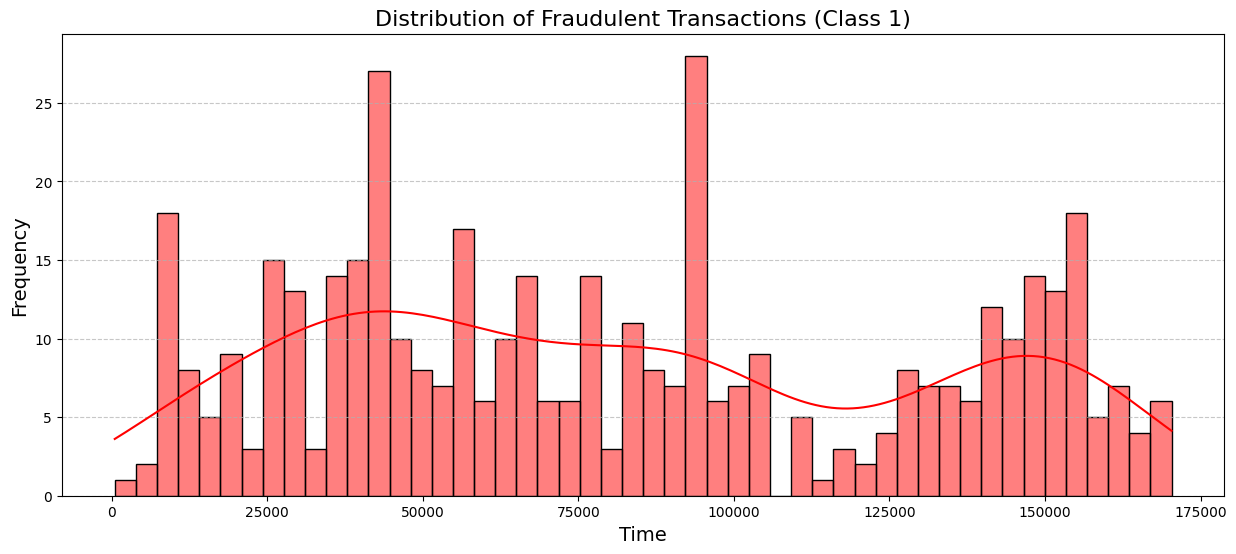

In [8]:
# Filter the data to include only fraudulent transactions (Class 1)
fraud_data = df[df['Class'] == 1]

# Create a figure with the specified size
plt.figure(figsize=(15, 6))

# Plot the distribution of fraudulent transactions over time
sns.histplot(fraud_data['Time'], bins=50, kde=True, color='red')

# Set the title of the plot
plt.title('Distribution of Fraudulent Transactions (Class 1)', fontsize=16)

# Label the x-axis
plt.xlabel('Time', fontsize=14)

# Label the y-axis
plt.ylabel('Frequency', fontsize=14)

# Add a grid to the y-axis with dashed lines and some transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

The histogram bars, colored in blue with a density estimate overlay, reveal significant peaks at certain time intervals, suggesting periods of increased fraudulent activity. These peaks highlight temporal patterns in fraudulent behavior, which can provide valuable insights for detecting and preventing fraud. However overall the frequency of fraudulent transactions is less changing relative to the non fraudulent ones.

### Module 3: Dimension Reduction

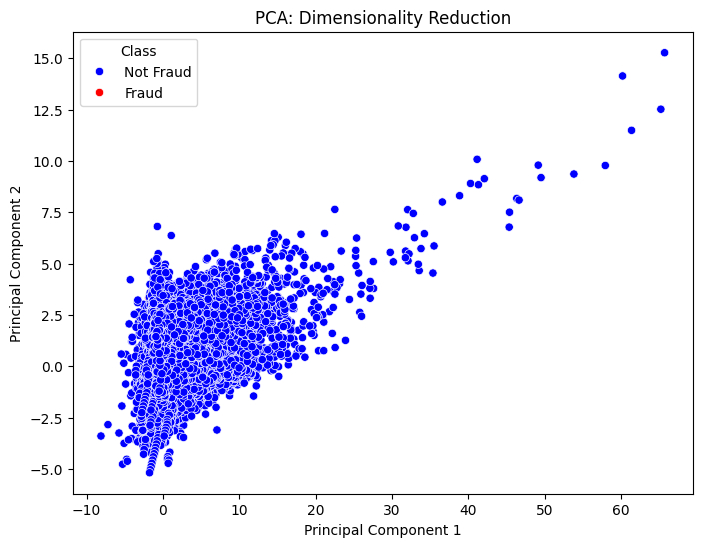

In [9]:
# Import necessary libraries for PCA and scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset into a pandas DataFrame
data = cleaned_data

# Separate features (X) and target (y)
X = data.drop(columns=["Class"])  # Remove the target column from features
y = data["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})  # Replace numeric labels with string labels for better visualization

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the feature data

# Perform PCA to reduce dimensionality to 18 components
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X_scaled)  # Apply PCA on the scaled data

# Plot the results of PCA
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette={'Not Fraud': 'blue', 'Fraud': 'red'})  # Create scatter plot
plt.title('PCA: Dimensionality Reduction')  # Set the title of the plot
plt.xlabel('Principal Component 1')  # Label for x-axis
plt.ylabel('Principal Component 2')  # Label for y-axis
plt.legend(title="Class", loc="best")  # Add legend with title and optimal placement
plt.show()  # Display the plot

The scatter plot shows a dense cluster of blue dots, which represent non-fraudulent transactions, indicating that most of the transactions are closely related in terms of their principal components. The lack of visible red dots, which would represent fraudulent transactions, highlights the challenge in distinguishing fraud cases due to their rarity in the dataset. This visualization emphasizes the significant class imbalance and the difficulty in detecting fraudulent transactions based on the first two principal components alone.

### Module 4: Classification

In [10]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [11]:
#Load the test dataset
df2 = pd.read_csv('creditcard_test.csv')

As the data set is highly imbalanced, we undersample as we randomly sample rows from the non fradylent transaction rows in order to have number of observations as the fradulent transactions.

In [12]:
# Import the resample function from sklearn.utils
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = cleaned_data[cleaned_data['Class'] == 0]  # DataFrame containing non-fraudulent transactions
df_minority = cleaned_data[cleaned_data['Class'] == 1]  # DataFrame containing fraudulent transactions

# Print original class distribution
print("Original class distribution:")
print(cleaned_data['Class'].value_counts())  # Output the count of each class before resampling

# Undersample the majority class to match the number of minority class samples
df_majority_undersampled = resample(
    df_majority, 
    replace=False,  # Sample without replacement to avoid duplicates
    n_samples=len(df_minority),  # Number of samples to match the minority class count
    random_state=42  # Set a random seed for reproducibility
)

# Combine the undersampled majority class with the original minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Print class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_undersampled['Class'].value_counts())  # Output the count of each class after resampling

# Shuffle the resulting DataFrame and reset the index
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle and reindex for a clean dataset

Original class distribution:
Class
0    244697
1        76
Name: count, dtype: int64

Class distribution after undersampling:
Class
0    76
1    76
Name: count, dtype: int64


After undersampling only 152 rows remain.

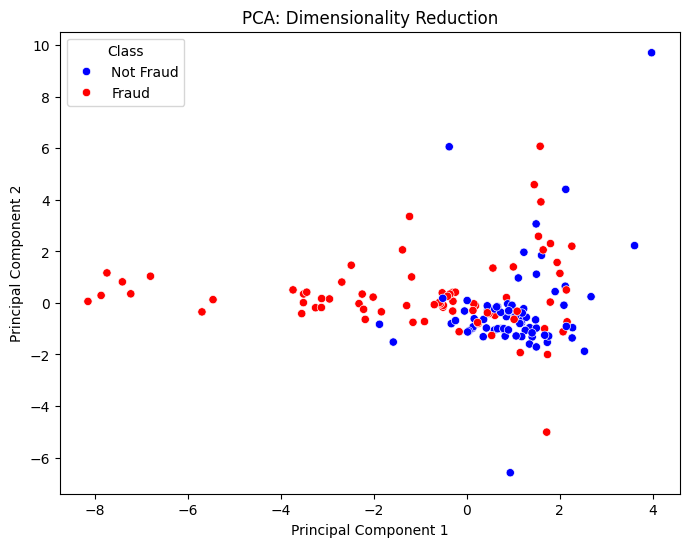

In [13]:
# Load dataset into a pandas DataFrame
data1 = df_undersampled  # Use the undersampled dataset

# Separate features (X) and target (y)
X1 = data1.drop(columns=["Class"])  # Remove the target column from features
y1 = data1["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})  # Replace numeric labels with string labels for better visualization

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)  # Scale the feature data

# Perform PCA to reduce dimensionality to 18 components
pca = PCA(n_components=18)
X1_pca = pca.fit_transform(X1_scaled)  # Apply PCA on the scaled data

# Plot the results of PCA
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.scatterplot(x=X1_pca[:, 0], y=X1_pca[:, 1], hue=y1, palette={'Not Fraud': 'blue', 'Fraud': 'red'})  # Create scatter plot with the correct target variable
plt.title('PCA: Dimensionality Reduction')  # Set the title of the plot
plt.xlabel('Principal Component 1')  # Label for x-axis
plt.ylabel('Principal Component 2')  # Label for y-axis
plt.legend(title="Class", loc="best")  # Add legend with title and optimal placement
plt.show()  # Display the plot


<Figure size 640x480 with 0 Axes>

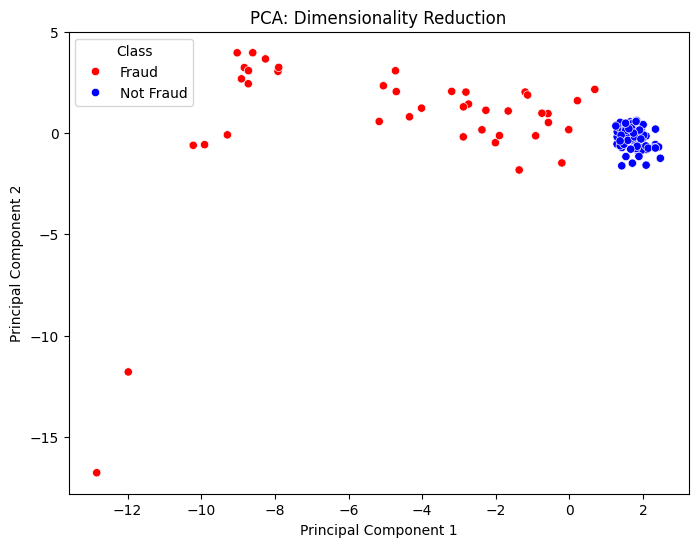

In [14]:
# Load dataset into a pandas DataFrame
data = df2  # Use the dataset stored in df2

# Separate features (X) and target (y)
X2 = data.drop(columns=["Class"])  # Remove the target column from features
y2 = data["Class"].replace({0: 'Not Fraud', 1: 'Fraud'})  # Replace numeric labels with string labels for better visualization

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)  # Scale the feature data to standardize it

# Perform PCA to reduce dimensionality to 18 components
pca = PCA(n_components=18)
X2_pca = pca.fit_transform(X2_scaled)  # Apply PCA on the scaled data

# Plot the results of PCA
plt.clf()  # Clear the current figure
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.scatterplot(x=X2_pca[:, 0], y=X2_pca[:, 1], hue=y2, palette={'Not Fraud': 'blue', 'Fraud': 'red'})  # Create scatter plot with the correct hue
plt.title('PCA: Dimensionality Reduction')  # Set the title of the plot
plt.xlabel('Principal Component 1')  # Label for x-axis
plt.ylabel('Principal Component 2')  # Label for y-axis
plt.legend(title="Class", loc="best")  # Add legend with title and optimal placement
plt.show()  # Display the plot


In [15]:
# Import necessary functions for model evaluation and performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialize a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Perform 5-fold cross-validation on the training set (X1_pca, y1) to evaluate the model
gnb_scores_train = cross_val_score(gnb_classifier, X1_pca, y1, cv=5)

# Fit the Gaussian Naive Bayes classifier to the training data
gnb_classifier.fit(X1_pca, y1)

# Predict the class labels for the training data
gnb_predictions_train = gnb_classifier.predict(X1_pca)

# Predict the class labels for the test data
gnb_predictions_test = gnb_classifier.predict(X2_pca)

# Calculate the accuracy score for the training predictions
gnb_accuracy_train = accuracy_score(y1, gnb_predictions_train)

# Calculate the accuracy score for the test predictions
gnb_accuracy_test = accuracy_score(y2, gnb_predictions_test)

# Compute the confusion matrix for the training predictions
gnb_cm_train = confusion_matrix(y1, gnb_predictions_train)

# Compute the confusion matrix for the test predictions
gnb_cm_test = confusion_matrix(y2, gnb_predictions_test)

In [16]:
# Outputting accuracy score for Gaussian Naive Bayes on training set
print("Accuracy on Training Set:")
print("Gaussian Naive Bayes: {:.2f}".format(gnb_accuracy_train))  # Print the accuracy score with two decimal places

Accuracy on Training Set:
Gaussian Naive Bayes: 0.76


In [17]:
#Outputting accuracy score for Gaussian Naive Bayes on test set
print("\nAccuracy on Test Set:")
print("Gaussian Naive Bayes: {:.2f}".format(gnb_accuracy_test))  # Print the accuracy score with two decimal places


Accuracy on Test Set:
Gaussian Naive Bayes: 0.93


Text(95.72222222222221, 0.5, 'True Label')

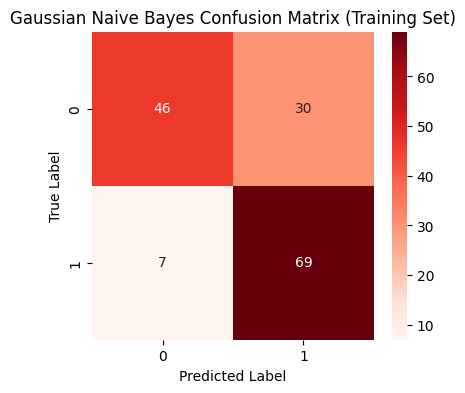

In [18]:
# Outputting the confusion matrix for Gaussian Naive Bayes as a heatmap for training set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, occupying the first position
sns.heatmap(gnb_cm_train, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a blue color map
plt.title("Gaussian Naive Bayes Confusion Matrix (Training Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis

Text(518.4494949494949, 0.5, 'True Label')

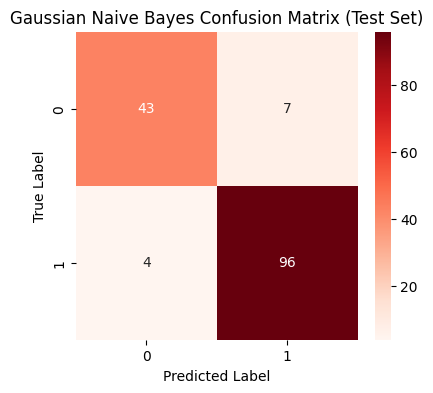

In [19]:
# Outputting the confusion matrix for Gaussian Naive Bayes as a heatmap for test set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 2)  # Create a subplot in a 1x2 grid, occupying the second position
sns.heatmap(gnb_cm_test, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a blue color map
plt.title("Gaussian Naive Bayes Confusion Matrix (Test Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis

In [20]:
# Initialize a Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Perform 5-fold cross-validation on the training set (X1_pca, y1) to evaluate the model
svm_scores_train = cross_val_score(svm_classifier, X1_pca, y1, cv=5)

# Fit the SVM classifier to the training data
svm_classifier.fit(X1_pca, y1)

# Predict the class labels for the training data
svm_predictions_train = svm_classifier.predict(X1_pca)

# Predict the class labels for the test data
svm_predictions_test = svm_classifier.predict(X2_pca)

# Calculate the accuracy score for the training predictions
svm_accuracy_train = accuracy_score(y1, svm_predictions_train)

# Calculate the accuracy score for the test predictions
svm_accuracy_test = accuracy_score(y2, svm_predictions_test)

# Compute the confusion matrix for the training predictions
svm_cm_train = confusion_matrix(y1, svm_predictions_train)

# Compute the confusion matrix for the test predictions
svm_cm_test = confusion_matrix(y2, svm_predictions_test)

In [21]:
#Outputting accuracy score for Support Vector Machine on training set
print("Accuracy on Training Set:")
print("Support Vector Machine: {:.2f}".format(svm_accuracy_train))  # Print the accuracy score with two decimal places

Accuracy on Training Set:
Support Vector Machine: 0.91


In [22]:
#Outputting accuracy score for Support Vector Machine on test set
print("\nAccuracy on Test Set:")
print("Support Vector Machine: {:.2f}".format(svm_accuracy_test))  # Print the accuracy score with two decimal places


Accuracy on Test Set:
Support Vector Machine: 0.93


Text(95.72222222222221, 0.5, 'True Label')

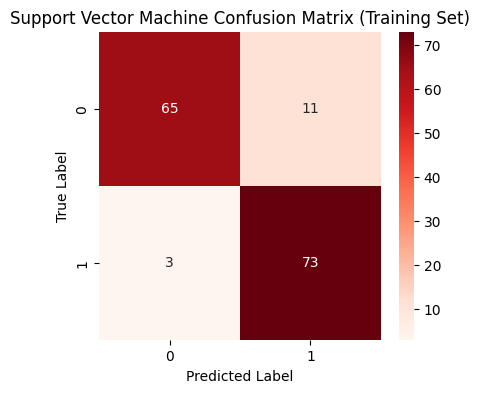

In [23]:
# Outputting the confusion matrix for support vector machine as a heatmap for training set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, occupying the first position
sns.heatmap(svm_cm_train, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a red color map
plt.title("Support Vector Machine Confusion Matrix (Training Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis

Text(518.4494949494949, 0.5, 'True Label')

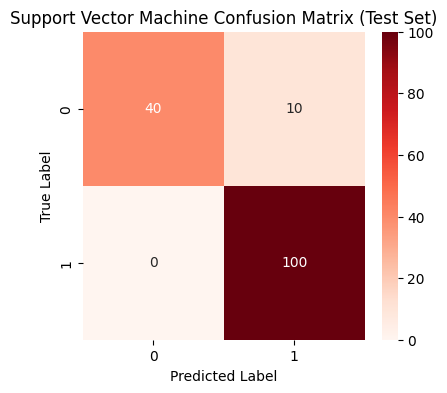

In [24]:
# Outputting the confusion matrix for support vector machine as a heatmap for test set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 2)  # Create a subplot in a 1x2 grid, occupying the second position
sns.heatmap(svm_cm_test, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a red color map
plt.title("Support Vector Machine Confusion Matrix (Test Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis

In [25]:
# Initialize a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=141,random_state=0)

# Perform 5-fold cross-validation on the training set (X1_pca, y1) to evaluate the model
rfc_scores_train = cross_val_score(rfc_classifier, X1_pca, y1, cv=5)

# Fit the RFC classifier to the training data
rfc_classifier.fit(X1_pca, y1)

# Predict the class labels for the training data
rfc_predictions_train = rfc_classifier.predict(X1_pca)

# Predict the class labels for the test data
rfc_predictions_test = rfc_classifier.predict(X2_pca)

# Calculate the accuracy score for the training predictions
rfc_accuracy_train = accuracy_score(y1, rfc_predictions_train)

# Calculate the accuracy score for the test predictions
rfc_accuracy_test = accuracy_score(y2, rfc_predictions_test)

# Compute the confusion matrix for the training predictions
rfc_cm_train = confusion_matrix(y1, rfc_predictions_train)

# Compute the confusion matrix for the test predictions
rfc_cm_test = confusion_matrix(y2, rfc_predictions_test)

In [26]:
#Outputting accuracy score for Random Forest on training set
print("Accuracy on Training Set:")
print("Random Forest: {:.2f}".format(rfc_accuracy_train))  # Print the accuracy score with two decimal places

Accuracy on Training Set:
Random Forest: 1.00


In [27]:
#Outputting accuracy score for K-Nearest Neighbour on test set
print("Accuracy on Test Set:")
print("Random Forest: {:.2f}".format(rfc_accuracy_test))  # Print the accuracy score with two decimal places

Accuracy on Test Set:
Random Forest: 0.90


Text(95.72222222222221, 0.5, 'True Label')

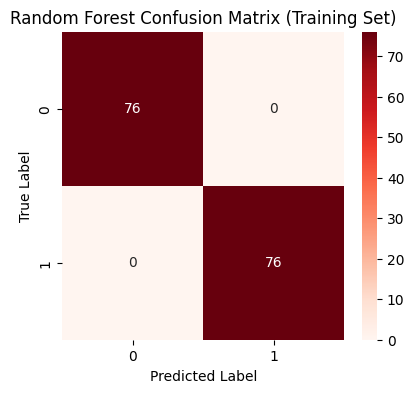

In [28]:
# Outputting the confusion matrix for Random Forest as a heatmap for training set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, occupying the first position
sns.heatmap(rfc_cm_train, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a red color map
plt.title("Random Forest Confusion Matrix (Training Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis


Text(95.72222222222221, 0.5, 'True Label')

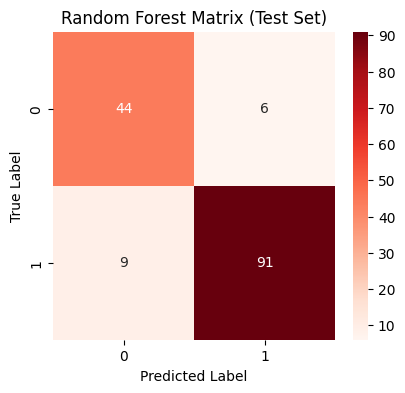

In [29]:
# Outputting the confusion matrix for Random Forest as a heatmap for test set
plt.figure(figsize=(10, 4))  # Set the size of the figure
plt.subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, occupying the first position
sns.heatmap(rfc_cm_test, annot=True, fmt="d", cmap="Reds")  # Create a heatmap with annotations and a red color map
plt.title("Random Forest Matrix (Test Set)")  # Set the title of the heatmap
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis

In [30]:
# Calculating accuracy rate and miscalculation rate for Gaussian Naive Bayes, SVM, and Random Forest

# Gaussian Naive Bayes (GNB) - Training set
gnb_accuracy_rate_train = np.diag(gnb_cm_train) / gnb_cm_train.sum(axis=1)  # Calculate the accuracy rate for each class
gnb_miscalculation_rate_train = 1 - gnb_accuracy_rate_train  # Calculate the miscalculation rate for each class

# Gaussian Naive Bayes (GNB) - Test set
gnb_accuracy_rate_test = np.diag(gnb_cm_test) / gnb_cm_test.sum(axis=1)  # Calculate the accuracy rate for each class
gnb_miscalculation_rate_test = 1 - gnb_accuracy_rate_test  # Calculate the miscalculation rate for each class

# Support Vector Machine (SVM) - Training set
svm_accuracy_rate_train = np.diag(svm_cm_train) / svm_cm_train.sum(axis=1)  # Calculate the accuracy rate for each class
svm_miscalculation_rate_train = 1 - svm_accuracy_rate_train  # Calculate the miscalculation rate for each class

# Support Vector Machine (SVM) - Test set
svm_accuracy_rate_test = np.diag(svm_cm_test) / svm_cm_test.sum(axis=1)  # Calculate the accuracy rate for each class
svm_miscalculation_rate_test = 1 - svm_accuracy_rate_test  # Calculate the miscalculation rate for each class

# Random Forest (RFC) - Training set
rfc_accuracy_rate_train = np.diag(rfc_cm_train) / rfc_cm_train.sum(axis=1)  # Calculate the accuracy rate for each class
rfc_miscalculation_rate_train = 1 - rfc_accuracy_rate_train  # Calculate the miscalculation rate for each class

# Random Forest (RFC) - Test set
rfc_accuracy_rate_test = np.diag(rfc_cm_test) / rfc_cm_test.sum(axis=1)  # Calculate the accuracy rate for each class
rfc_miscalculation_rate_test = 1 - rfc_accuracy_rate_test  # Calculate the miscalculation rate for each class


In [31]:
# Outputting the accuracy rate and miscalculation rate for the training set

# Print the accuracy rate for each model on the training set
print("Accuracy Rate (Training Set):")
print("Gaussian Naive Bayes: ", gnb_accuracy_rate_train)  # Print the accuracy rate for Gaussian Naive Bayes
print("Support Vector Machine: ", svm_accuracy_rate_train)  # Print the accuracy rate for Support Vector Machine
print("Random Forest: ", rfc_accuracy_rate_train)  # Print the accuracy rate for K-Nearest Neighbors
print()  # Print a blank line for separation

# Print the miscalculation rate for each model on the training set
print("Miscalculation Rate (Training Set):")
print("Gaussian Naive Bayes: ", gnb_miscalculation_rate_train)  # Print the miscalculation rate for Gaussian Naive Bayes
print("Support Vector Machine: ", svm_miscalculation_rate_train)  # Print the miscalculation rate for Support Vector Machine
print("Random Forest: ", rfc_miscalculation_rate_train)  # Print the miscalculation rate for K-Nearest Neighbors

Accuracy Rate (Training Set):
Gaussian Naive Bayes:  [0.60526316 0.90789474]
Support Vector Machine:  [0.85526316 0.96052632]
Random Forest:  [1. 1.]

Miscalculation Rate (Training Set):
Gaussian Naive Bayes:  [0.39473684 0.09210526]
Support Vector Machine:  [0.14473684 0.03947368]
Random Forest:  [0. 0.]


In [32]:
# Outputting the accuracy rate and miscalculation rate for the test set

# Print the accuracy rate for each model on the test set
print("Accuracy Rate (Test Set):")
print("Gaussian Naive Bayes: ", gnb_accuracy_rate_test)  # Print the accuracy rate for Gaussian Naive Bayes
print("Support Vector Machine: ", svm_accuracy_rate_test)  # Print the accuracy rate for Support Vector Machine
print("Random Forest: ", rfc_accuracy_rate_test)  # Print the accuracy rate for K-Nearest Neighbors
print()  # Print a blank line for separation

# Print the miscalculation rate for each model on the test set
print("Miscalculation Rate (Test Set):")
print("Gaussian Naive Bayes: ", gnb_miscalculation_rate_test)  # Print the miscalculation rate for Gaussian Naive Bayes
print("Support Vector Machine: ", svm_miscalculation_rate_test)  # Print the miscalculation rate for Support Vector Machine
print("Random Forest: ", rfc_miscalculation_rate_test)  # Print the miscalculation rate for K-Nearest Neighbors

Accuracy Rate (Test Set):
Gaussian Naive Bayes:  [0.86 0.96]
Support Vector Machine:  [0.8 1. ]
Random Forest:  [0.88 0.91]

Miscalculation Rate (Test Set):
Gaussian Naive Bayes:  [0.14 0.04]
Support Vector Machine:  [0.2 0. ]
Random Forest:  [0.12 0.09]


In [33]:
# Selecting the model with the highest cross-validation score

# Define a list of model names
models = ['Gaussian Naive Bayes', 'Support Vector Machine', 'Random Forest']

# Calculate the mean cross-validation scores for each model
scores = [gnb_scores_train.mean(), svm_scores_train.mean(), rfc_scores_train.mean()]

# Identify the model with the highest score
best_model = models[np.argmax(scores)]

# Print the name of the best model
print("Best Model using 5-fold cross validation accuracy score: {}".format(best_model))

Best Model using 5-fold cross validation accuracy score: Random Forest


### Module 5: Summary

Based on the analysis of credit card transactions, the dataset shows a significant imbalance between fraudulent and non-fraudulent transactions. 

Distinct patterns emerge for both fraudulent and non-fraudulent activities. Non-fraudulent transactions show a high concentration of smaller amounts, with a peak around $10 (10^1 on the log scale), and their frequency varies significantly over time, suggesting regular daily transaction patterns. 

In contrast, fraudulent transactions, while also more common in smaller amounts, show a more spread-out distribution with a higher proportion of larger transactions compared to non-fraudulent ones. The temporal distribution of fraudulent transactions is more uniform, lacking the pronounced peaks seen in non-fraudulent activity. This suggests that fraudulent activities don't follow typical daily transaction patterns and may occur more randomly throughout the day. 

These distinctions in amount distribution and temporal patterns provide valuable insights for fraud detection systems, highlighting the importance of considering both transaction size and timing in identifying potential fraudulent activities.

After undersampling to balance the classes, the distribution of transactions over time revealed distinct patterns for both fraudulent and non-fraudulent activities. Three classification models - Gaussian Naive Bayes, Support Vector Machine, and Random Forest - were applied to predict fraudulent transactions. 

All models demonstrated high accuracy on the training set, with Random Forest achieving perfect accuracy. However, on the test set, the Support Vector Machine performed best with 93% accuracy alongside Gaussian Naive Bayes, followed by the Random Forest model. 

The Random Forest model showed some signs of overfitting compared with the other models, with perfect accuracy on the training set but lower performance on the test set. The confusion matrices and accuracy rates indicate that while all models performed well in identifying fraudulent transactions, they had varying success in detecting non-fraudulent ones relatively speaking. 

However, overall speaking the Random Forest model appears to be the most balanced and effective model for this credit card fraud detection task, considering its performance on both training and test sets which is further backed up by the cross validation score of all 3 models using 5-fold cross validation accuracy score on test set, where Random Forest ended up being the best model.